In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

In [120]:
product = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
products_train = pd.read_csv('order_products__train.csv')
departments = pd.read_csv('departments.csv')
products_prior = pd.read_csv('order_products__prior.csv')
aisles = pd.read_csv('aisles.csv')

In [137]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [138]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [139]:
products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [140]:
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [141]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [142]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [123]:
products_train.shape

(1384617, 4)

In [124]:
products_prior.shape

(32434489, 4)

In [128]:
#order products train and prior contcatenation + size
all_product_orders = pd.concat([products_train, products_prior], axis=0)
print("all_product_orders size is:", all_product_orders.shape)

all_product_orders size is: (33819106, 4)


In [130]:
all_product_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
#Unique orders and products number

In [129]:
unique_orders = len(set(all_product_orders.order_id))
unique_products = len(set(all_product_orders.product_id))
print("No. of Orders %s, No. of Products %s" %(unique_orders, unique_products))

No. of Orders 3346083, No. of Products 49685


In [ ]:
# Plot number of products ordered by users

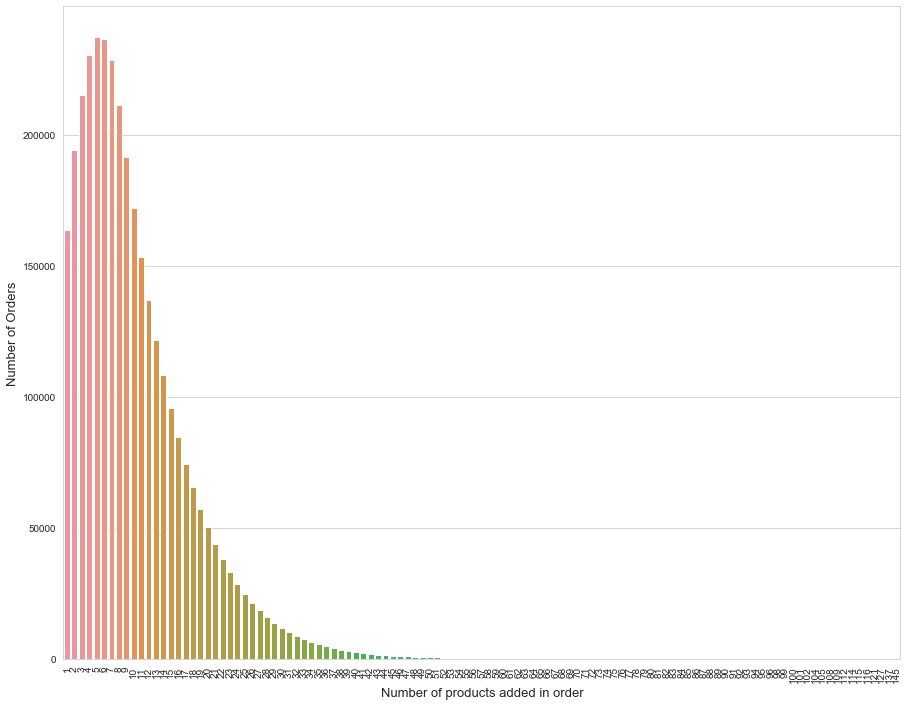

In [134]:
group = all_product_orders.groupby("order_id")["product_id"].aggregate('count').reset_index()
group = group.product_id.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='vertical')
sns.barplot(group.index, group.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

In [136]:
#top products with total reorders
grouped = all_product_orders.groupby("product_id")["add_to_cart_order"].aggregate({'Total_reorders': 'sum'}).reset_index()
grouped = pd.merge(grouped, product[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

,product_id,Total_reorders,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries
26206,26209,146660,Limes
27842,27845,142813,Organic Whole Milk


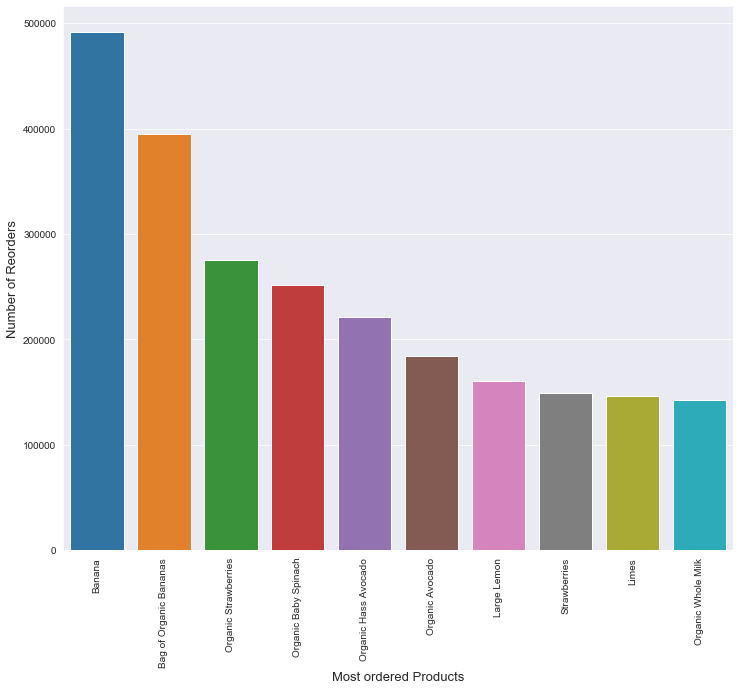

In [143]:
grouped  = grouped.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

In [41]:
prior = pd.merge(order_products_prior, product, on='product_id' )

In [51]:
prior_orders = pd.merge(prior, orders, on= 'order_id')

In [53]:
prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


In [ ]:
#Comparing order tables and

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a65a110b8>,
      dtype=object)

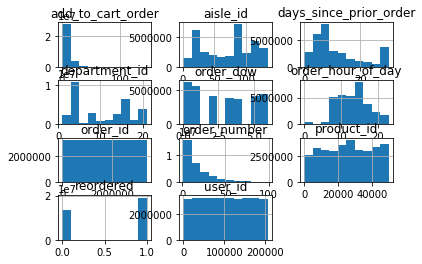

In [55]:
prior_orders.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6eb82860>,
      dtype=object)

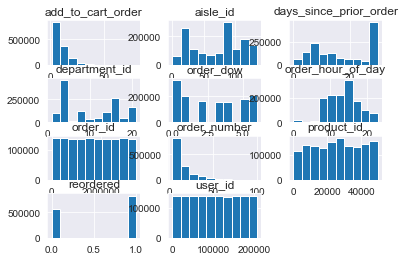

In [146]:
train_orders.hist()

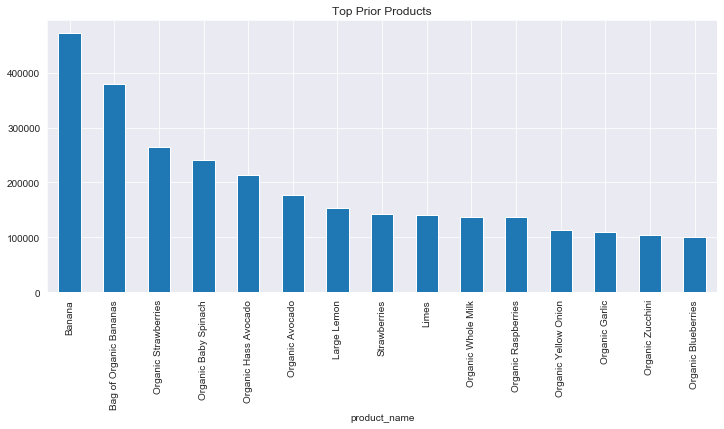

In [144]:
top_prior_products = 15
plt.figure(figsize=(12, 5))
prior_orders.groupby(['product_name']).count()['product_id']\
.sort_values(ascending=False)[:top_prior_products].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Top Prior Products')

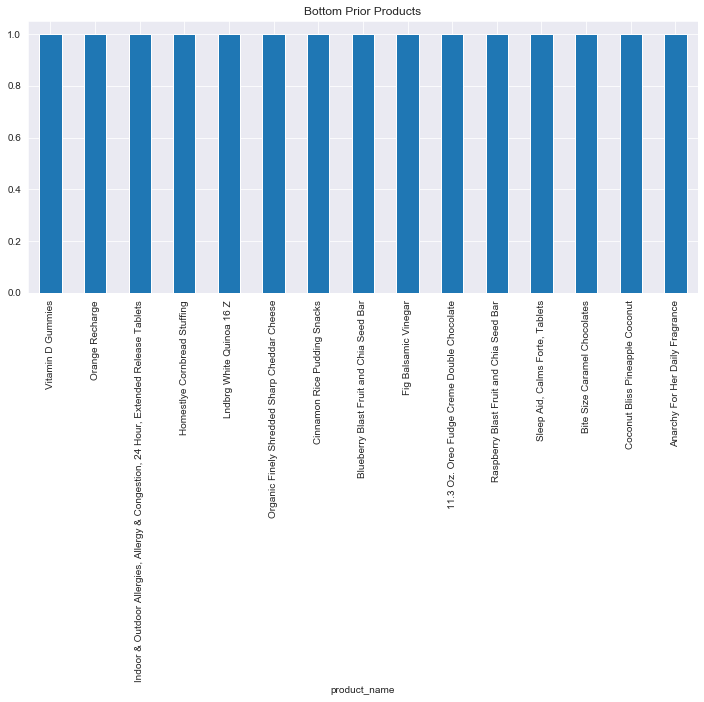

In [149]:
bottom_prior_products = 15
plt.figure(figsize=(12, 5))
prior_orders.groupby(['product_name']).count()['product_id']\
.sort_values(ascending=True)[:bottom_prior_products].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Bottom Prior Products')

In [61]:
train = pd.merge(products_train, product, on='product_id')

In [63]:
train_orders = pd.merge(train, orders, on='order_id')

In [145]:
train_mod = pd.merge(train_orders, aisles, on='aisle_id' )

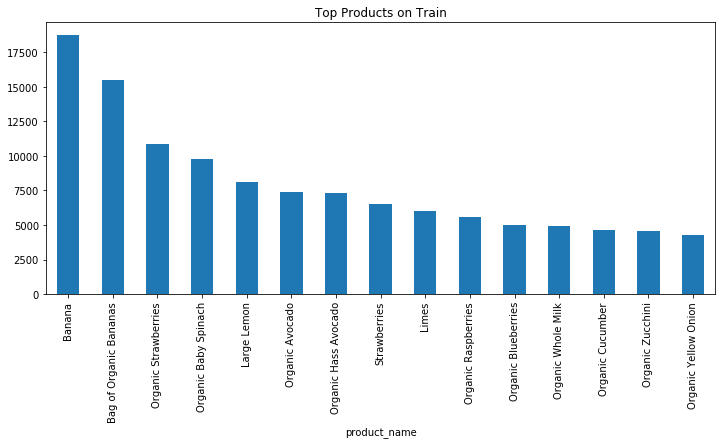

In [65]:
top_products_ontrain = 15
plt.figure(figsize=(12, 5))
train_orders.groupby(['product_name']).count()['product_id']\
.sort_values(ascending=False)[:top_products_ontrain].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Top Products on Train')

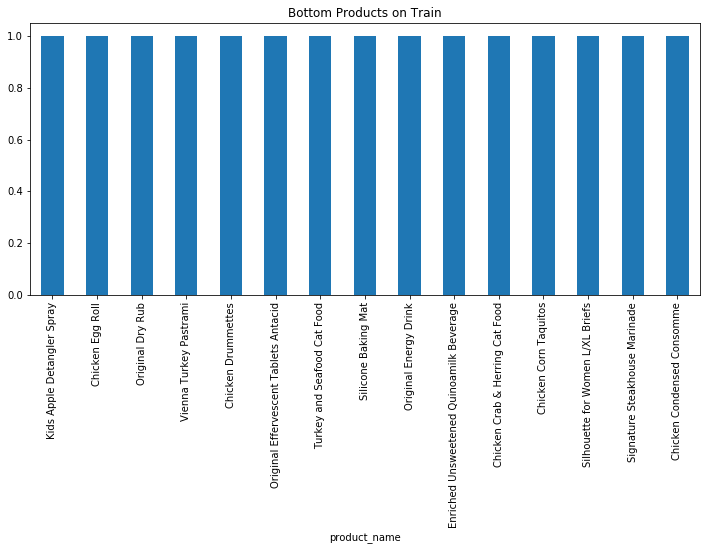

In [67]:
bottom_products_ontrain = 15
plt.figure(figsize=(12, 5))
train_orders.groupby(['product_name']).count()['reordered']\
.sort_values(ascending=True)[:bottom_products_ontrain].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Bottom Products on Train')

In [69]:
product_by_reordered = pd.DataFrame({'mean_reorder': products_train.groupby(['product_id'])['reordered'].mean(),
                                    'count': products_train.groupby(['product_id'])['order_id'].count()})
product_by_reordered = product_by_reordered.reset_index()

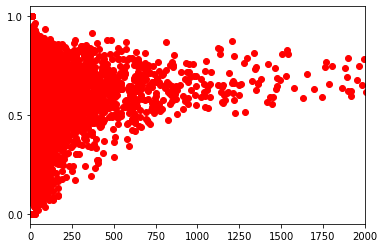

In [71]:
plt.xlim([0,2000])
plt.yticks([0,0.5,1.0,1.5])
plt.plot(product_by_reordered['count'],product_by_reordered['mean_reorder'] , 'ro')
plt.show()

In [105]:
top_user = pd.read_csv('topuser.csv')
top_order = pd.read_csv('toporder.csv')

In [106]:
top_order.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2813632,43772,2,1,Cherubs Heavenly Salad Tomatoes,83,4
1,2813632,27360,4,1,Boneless Skinless Chicken Breast Fillets,49,12
2,2813632,48370,6,1,Sensitive Toilet Paper,54,17
3,2813632,17334,8,1,Coffee Ice Cream,37,1
4,2813632,20463,11,1,Organic Fat-Free Milk,84,16


In [168]:
top_order_products = 15
plt.figure(figsize=(12, 5))
top_order.groupby(['product_name']).count()['reordered']\
.sort_values(ascending=False)[:top_order_products].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Top Products on Train')

KeyError: 'reordered'

<Figure size 864x360 with 0 Axes>

In [93]:
top_user.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1931842,149753,prior,1,0,19,NaN
1,2026142,149753,prior,2,0,13,21.0
2,804132,149753,prior,3,3,19,10.0
3,1247232,149753,prior,4,0,10,11.0
4,1464159,149753,prior,5,2,9,9.0


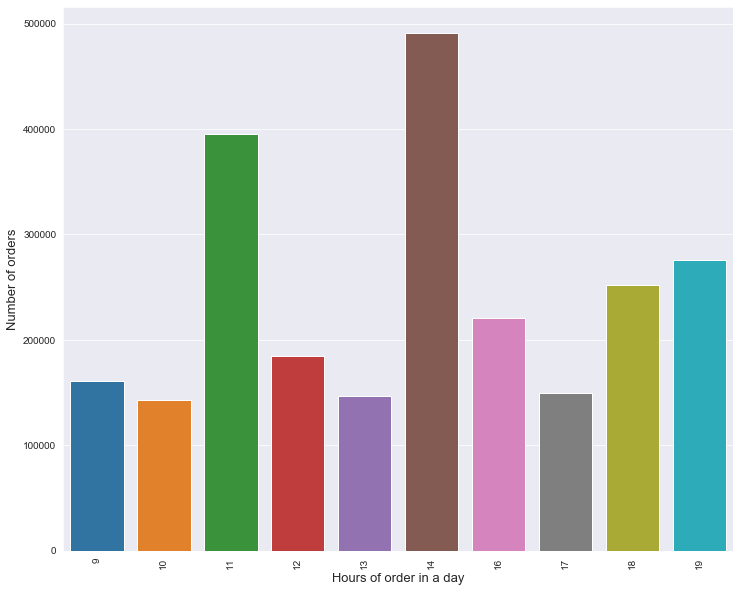

In [154]:
user_hod = top_user.groupby('order_id')['order_hour_of_day'].aggregate('sum').reset_index()
user_hod = user_hod.order_hour_of_day.value_counts()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(user_hod.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()